# Deduplication based on source info

## HPLT 2.0

In [3]:
with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f:
    for line in f:
        print(line)
        break

https://hoshcha-rada.gov.ua/	2022-03-01T08:14:43Z	Перелік укриттів на території Гощанської територіа



In [6]:
unique_timestamps = set()
i = 0

with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f:
    for line in f:
        timestamp = line.split('\t')[1]
        if timestamp in unique_timestamps:
            print(line.strip())
            i += 1
        unique_timestamps.add(timestamp)

        if i > 10:
            break

print(len(unique_timestamps))


https://hoshcha-rada.gov.ua/rishennya-sorok-somoi-sesii-goschanskoi-selischnoi-radi-20-grudnya-2019-roku-18-37-54-28-01-2021/	2022-03-01T08:15:16Z	Рішення сорок сьомої сесії Гощанської селищної рад
https://hoshcha-rada.gov.ua/rishennya-chotirnadcyatoi-sesii-goschanskoi-selischnoi-radi-10-grudnya-2021-roku-15-49-18-17-12-2021/	2022-03-01T08:15:16Z	Рішення чотирнадцятої сесії Гощанської селищної ра
https://vlada.ua/propozytsiyi/propozitsiya-gromadam/	2022-03-01T08:15:56Z	Запрошуємо до співпраці всіх голів новостворених Г
https://hoshcha-rada.gov.ua/rishennya-trinadcyatoi-sesii-goschanskoi-selischnoi-radi-5-listopada-2021-roku-11-31-24-11-11-2021/	2022-03-01T08:16:39Z	Рішення тринадцятої сесії Гощанської селищної ради
https://hoshcha-rada.gov.ua/pidtrimka-fermerstva-09-03-59-25-05-2021/	2022-03-01T08:16:46Z	Підтримка фермерства~~- Постанова КМУ від 08.02.201
https://hoshcha-rada.gov.ua/rishennya-p%E2%80%99yatdesyat-drugoi-sesii-goschanskoi-selischnoi-radi-09-chervnya-2020-roku-18-43-05-28

In [8]:
unique_urls = set()
i = 0

with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f:
    for line in f:
        url = line.split('\t')[0]
        if url in unique_urls:
            print(line.strip())
            i += 1
        unique_urls.add(url)

        if i > 10:
            break

print(len(unique_urls))


https://bykvu.com/ua/	2022-06-29T18:34:33Z	7cc1~~Під час масштабного обміну військовополоненим
https://bykvu.com/ua/	2022-02-28T23:01:01Z	7c54~~24 лютого ворог підступно напав на Україну. У
https://rda.org.ua/	2022-04-07T02:33:32Z	Здивуйте відвідувачів елегантністю сайту і унікаль
https://www.president.gov.ua/	2022-04-07T03:38:27Z	00006000~~5 квітня 2022 року - 20:06~~7 квітня 2022
https://www.president.gov.ua/	2021-07-01T04:48:52Z	25dbd~~4 червня 2021 року - 20:20~~28 червня 2021 ро
https://bykvu.com/ua/	2021-07-03T02:38:01Z	7c3a~~Невизнаний президент Білорусі Олександр Лукаш
https://armyinform.com.ua/wp-content/themes/font/fontello.svg?52478187	2022-02-24T11:41:59Z	fddc~~Львівський обласний госпіталь ветеранів війн
https://www.president.gov.ua/	2022-03-13T21:42:54Z	25f53~~13 березня 2022 року - 01:05~~13 березня 2022
https://decentralization.gov.ua/news/8243	2022-02-28T16:27:13Z	1cce~~Завершити реформу децентралізації – серед пер
https://bykvu.com/ua/	2022-04-04T08:28:09Z	7c55~~Після

In [ ]:
del unique_urls
del unique_timestamps

In [1]:
from collections import defaultdict


unique_combined = set()
duplicates = set()
i = 0

with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f:
    for line in f:
        url = line.split('\t')[0]
        timestamp = line.split('\t')[1]
        text = line.split('\t', 2)[-1]
        combined = (url, timestamp)
        if combined in unique_combined:
            duplicates.add(combined)
            i += 1
        unique_combined.add(combined)

        if i > 20:
            print('WARNING: more than 20 documents')
            break

print('Unique combined:', len(unique_combined))
print('Duplicates:', len(duplicates))
del unique_combined

combined2text = defaultdict(list)
with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f:
    for line in f:
        url = line.split('\t')[0]
        timestamp = line.split('\t')[1]
        text = line.split('\t', 2)[-1]
        combined = (url, timestamp)

        if combined in duplicates:
            combined2text[combined].append(text)

for combined, texts in combined2text.items():
    print(combined)
    for text in texts:
        print(f'  > {text.strip()}')
    print()


Unique combined: 47395785
Duplicates 2
('https://dostup.pravda.com.ua/request/dieputati_oblasnoyi_radi', '2022-01-29T03:45:36Z')
  > Депутати обласної ради~~-~~Від: Denis~~До: Дніпропетр
  > Депутати обласної ради~~-~~Від: Denis~~До: Дніпропетр

('https://dut.edu.ua/ua/news-1-577-9949-z-dnem-narodzhennya-charivnu-olenu-volodimirivnu-vinogradovu-profesora-zaviduyuchu-kafedroyu%C3%82%C2%A0marketingu_navchalno-naukoviy-institut-menedzhmentu-ta-pidpriemnictva-navchalno-naukovi-instituti', '2022-02-26T12:53:59Z')
  > 3d77~~Шановні абітурієнти!~~У Вас є останній шанс га
  > 3d77~~Шановні абітурієнти!~~У Вас є останній шанс га



## FineWeb2

In [14]:
unique_combined = set()
i = 0

with open('/media/storage/masters/corpora-sources/0000_fineweb2_source_info.txt', 'r') as f:
    for line in f:
        combined = (line.split('\t')[0], line.split('\t')[1])
        if combined in unique_combined:
            print(line.strip())
            i += 1
        unique_combined.add(combined)

        if i > 20:
            break

print(len(unique_combined))

http://semenovka.at.ua/news/2018-08-31	2024-02-25T12:07:15Z	30.08.2018 року о 21 год. 10 хв. на пункт зв’язку
https://provikna.lviv.ua/markizy/vertykalna-markiza.html	2024-03-03T08:44:44Z	Вертикальні маркізи - це тип тентової конструкції,
https://fineline.ua/yaki-preparaty-dlya-biorevitalizatsiyi-vykorystovuyutsya/	2024-03-03T12:55:40Z	У процедурі біоревіталізації використовуються різн
https://air-conditioner.ua/uk/konditsioner-cooper-hunter-ch-s09xp7.html	2024-02-28T09:16:31Z	Настінна спліт-система Cooper&Hunter CH-S09XP7 вол
https://smartcafe.com.ua/uk/infocentr/10-pravil-upravlinskogo-obliku-v-restorani	2024-02-28T07:16:25Z	У веденні ресторанного бізнесу деталі вирішують вс
https://infoindustria.com.ua/bayer-vidkriva%D1%94-novu-laboratoriyu-vivchennya-tobrfv/	2024-02-29T06:13:34Z	30.05.2023~~Bayer відсвяткував відкриття нової лабо
http://vpu27.zp.ua/2018/10/08/zasidannya-ekspertnoyi-grupy/	2024-02-28T08:47:44Z	08 жовтня 2018 року на базі ДНЗ «Запорізьке машино
https://fineline.ua/pr

In [ ]:
from collections import defaultdict


unique_combined = set()
duplicates = set()
i = 0

with open('/media/storage/masters/corpora-sources/0000_fineweb2_source_info.txt', 'r') as f:
    for line in f:
        url = line.split('\t')[0]
        timestamp = line.split('\t')[1]
        text = line.split('\t', 2)[-1]
        combined = (url, timestamp)
        if combined in unique_combined:
            duplicates.add(combined)
            i += 1
        unique_combined.add(combined)

        if i > 20:
            print('WARNING: more than 20 documents')
            break

print('Unique combined:', len(unique_combined))
print('Duplicates:', len(duplicates))
del unique_combined

combined2text = defaultdict(list)
with open('/media/storage/masters/corpora-sources/0000_fineweb2_source_info.txt', 'r') as f:
    for line in f:
        url = line.split('\t')[0]
        timestamp = line.split('\t')[1]
        text = line.split('\t', 2)[-1]
        combined = (url, timestamp)

        if combined in duplicates:
            combined2text[combined].append(text)

for combined, texts in combined2text.items():
    print(combined)
    for text in texts:
        print(f'  > {text.strip()}')
    print()


('https://smartcafe.com.ua/uk/infocentr/10-pravil-upravlinskogo-obliku-v-restorani', '2024-02-28T07:16:25Z')
  > Яка найпоширеніша проблема серед власників рестора
  > У веденні ресторанного бізнесу деталі вирішують вс

('http://semenovka.at.ua/news/2018-08-31', '2024-02-25T12:07:15Z')
  > Семенівською міською радою, за плідної співпраці з
  > 30.08.2018 року о 21 год. 10 хв. на пункт зв’язку

('https://provikna.lviv.ua/markizy/vertykalna-markiza.html', '2024-03-03T08:44:44Z')
  > Вертикальні маркізи - це тип тентової конструкції,
  > Вертикальні маркізи - це тип тентової конструкції,

('https://fineline.ua/yaki-preparaty-dlya-biorevitalizatsiyi-vykorystovuyutsya/', '2024-03-03T12:55:40Z')
  > Біоревіталізація – це сучасна ін’єкційна процедура
  > У процедурі біоревіталізації використовуються різн

('https://fineline.ua/presoterapiya-odna-z-krashhyh-aparatnyh-poslug/', '2024-03-03T12:05:52Z')
  > Пресотерапія є однією з найкращих апаратних послуг
  > Пресотерапія є однією з найкращих а

## Cultura-X

In [22]:
unique_combined = set()
empty_urls = 0
i = 0

with open('/media/storage/masters/corpora-sources/0000_culturax_source_info.txt', 'r') as f:
    for line in f:
        url = line.split('\t')[0]
        timestamp = line.split('\t')[1]

        if not url:
            empty_urls += 1
            continue
        
        combined = (url, timestamp)
        if combined in unique_combined:
            print(line.strip())
            i += 1
        unique_combined.add(combined)

        if i > 20:
            break

print(len(unique_combined))
print(f'Empty URLs: {empty_urls}, ratio: {empty_urls / len(unique_combined):.2%}')

40692422
Empty URLs: 4048122, ratio: 9.95%


# Cross-check

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_histogram(data, bins=10, title='Histogram', xlabel='Value', ylabel='Frequency', color='blue', edgecolor='black', alpha=0.7):
    """
    Plots a beautiful histogram using matplotlib and seaborn.
    
    Parameters:
    - data (list, numpy array, or PyTorch tensor): The data to plot.
    - bins (int or sequence): Number of bins or specific bin edges.
    - title (str): Title of the histogram.
    - xlabel (str): Label for the x-axis.
    - ylabel (str): Label for the y-axis.
    - color (str): Color of the bars.
    - edgecolor (str): Color of the edges of the bars.
    - alpha (float): Transparency level of the bars (0.0 to 1.0).

    Returns:
    - None
    """
    # Convert PyTorch tensor to NumPy array if needed
    if isinstance(data, list):
        data = np.array(data)  # Convert list to NumPy array for uniform handling

    # Ensure data is one-dimensional
    if data.ndim != 1:
        raise ValueError("Input data must be one-dimensional.")

    # Calculate statistics
    mean = np.mean(data)
    std = np.std(data)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=bins, kde=False, color=color, edgecolor=edgecolor, alpha=alpha)

    # Add vertical lines for mean and ±1 std
    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'$\mu: {mean:.3f}$')
    plt.axvline(mean - std, color='orange', linestyle=':', linewidth=2, label=f'$\mu - \sigma: {mean - std:.3f}$')
    plt.axvline(mean + std, color='green', linestyle=':', linewidth=2, label=f'$\mu + \sigma: {mean + std:.3f}$')

    # Customizing the plot
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add legend
    plt.legend(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

## HPLT 2.0 vs Fineweb2

In [2]:
import tqdm

unique_combined = set()

fineweb2_docs = 0
hplt2_docs = 0
duplicates = 0

with open('/media/storage/masters/corpora-sources/0000_fineweb2_source_info.txt', 'r') as f:
    for line in f:
        fineweb2_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        # if combined in unique_combined:
        #     duplicates.add(combined)
        unique_combined.add(combined)


duplicates_bar = tqdm.tqdm(desc='duplicates')

with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f:
    for line in f:
        hplt2_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        if combined in unique_combined:
            duplicates += 1
            duplicates_bar.update()

print(f"Total Fineweb2 documents: {fineweb2_docs:,}")
print(f"Total HPLT 2.0 documents: {hplt2_docs:,}")
print(f"Number of duplicates: {duplicates:,}")
print(f"Duplicate percentage (of HPLT 2.0): {(duplicates / hplt2_docs):.2%}")
print(f"Duplicate percentage (of Fineweb2): {(duplicates / fineweb2_docs):.2%}")

duplicates: 47552562it [20:08, 39349.67it/s] 


Total Fineweb2 documents: 47,552,562
Total HPLT 2.0 documents: 47,395,787
Number of duplicates: 5,011,632
Duplicate percentage (of HPLT 2.0): 10.57%
Duplicate percentage (of Fineweb2): 10.54%


### Comparing texts for duplicates

In [1]:
unique_combined = set()

fineweb2_docs = 0
hplt2_docs = 0
duplicates = 0

with open('/media/storage/masters/corpora-sources/0000_fineweb2_source_info.txt', 'r') as f:
    for line in f:
        fineweb2_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        # if combined in unique_combined:
        #     duplicates.add(combined)
        unique_combined.add(combined)

with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f, \
     open('/media/storage/masters/corpora-sources/hplt-fineweb-duplicates.txt', 'w') as w:

    for line in f:
        hplt2_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        if combined in unique_combined:
            duplicates += 1
            w.write(f'{combined[0]}\t{combined[1]}\n')

del unique_combined

In [8]:
duplicates = set()
with open('/media/storage/masters/corpora-sources/hplt-fineweb-duplicates.txt') as f:
    for line in f:
        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1].strip()
        combined = (url, timestamp)

        duplicates.add(combined)
    
len(duplicates)

5011632

In [10]:
!pip install pylcs

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for pylcs: filename=pylcs-0.1.1-cp310-cp310-linux_x86_64.whl size=1082173 sha256=7ab5479a58681684bf10a777f343b1d6947a107d0a307f03751c34caecf3c3a3
  Stored in directory: /home/goader/.cache/pip/wheels/eb/64/e8/c902162e883f432251466566e011016795ea03b95d4350d0ee
Successfully built pylcs


In [17]:
import pylcs
import tqdm.notebook as tqdm

duplicate2text = dict()

with open('/media/storage/masters/corpora-sources/0000_fineweb2_source_info.txt', 'r') as f:
    for line in f:
        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        text = parts[2]
        combined = (url, timestamp)

        if combined in duplicates:
            duplicate2text[combined] = text


exact_matches = 0
similarities = []

progress_bar = tqdm.tqdm(total=len(duplicate2text))

with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f:
    for line in f:
        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        text = parts[2]
        combined = (url, timestamp)

        if (other_text := duplicate2text.get(combined)):
            progress_bar.update()
            similarities.append(pylcs.lcs(text, other_text) / min(len(text), len(other_text)))
            if text == other_text:
                exact_matches += 1


print(f"Number of duplicates: {len(duplicates):,}")
print(f"Number of exact matches: {exact_matches:,}")
print(f"Ratio of exact matches to duplicates: {exact_matches / len(duplicates):.2%}")

  0%|          | 0/5011632 [00:00<?, ?it/s]

 21%|██        | 1044694/5011632 [02:32<09:38, 6852.69it/s] 


Number of duplicates: 5,011,632
Number of exact matches: 4,056,508
Ratio of exact matches to duplicates: 80.94%


/home/goader/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


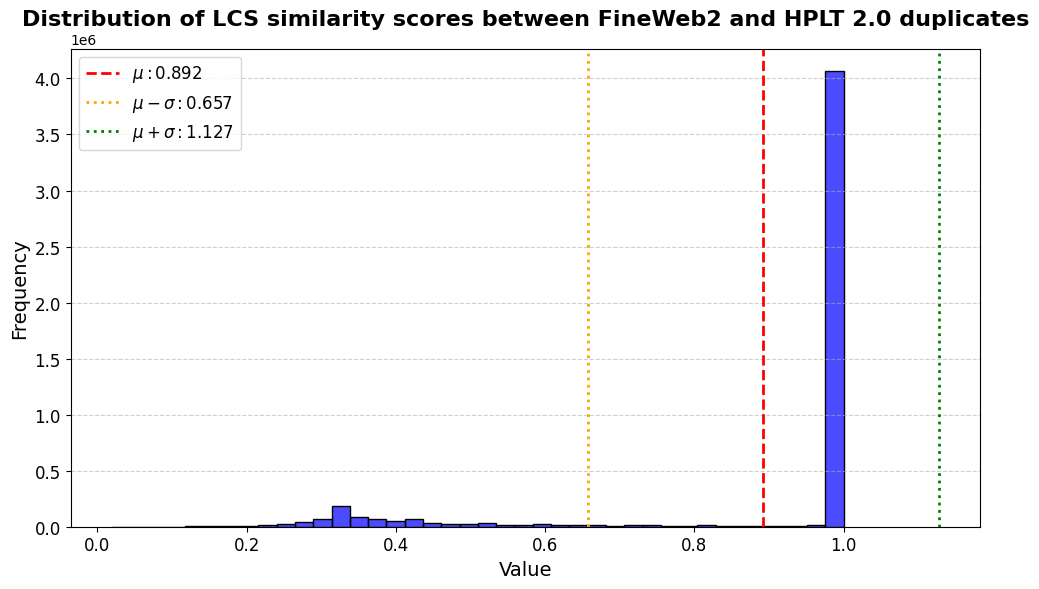

In [18]:
plot_histogram(similarities, bins=40, title="Distribution of LCS similarity scores between FineWeb2 and HPLT 2.0 duplicates")

## HPLT 2.0 vs CulturaX

In [3]:
import tqdm

unique_combined = set()

culturax_docs = 0
hplt2_docs = 0
duplicates = 0

with open('/media/storage/masters/corpora-sources/0000_culturax_source_info.txt', 'r') as f:
    for line in f:
        culturax_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        # if combined in unique_combined:
        #     duplicates.add(combined)
        unique_combined.add(combined)


duplicates_bar = tqdm.tqdm(desc='duplicates')

with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f:
    for line in f:
        hplt2_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        if combined in unique_combined:
            duplicates += 1
            duplicates_bar.update()

print(f"Total CulturaX documents: {culturax_docs:,}")
print(f"Total HPLT 2.0 documents: {hplt2_docs:,}")
print(f"Number of duplicates: {duplicates:,}")
print(f"Duplicate percentage (of HPLT 2.0): {(duplicates / hplt2_docs):.2%}")
print(f"Duplicate percentage (of CulturaX): {(duplicates / culturax_docs):.2%}")

duplicates: 5011632it [10:07, 8243.76it/s]  
duplicates: 3748748it [01:09, 56709.50it/s] 

Total CulturaX documents: 44,740,544
Total HPLT 2.0 documents: 47,395,787
Number of duplicates: 3,748,748
Duplicate percentage (of HPLT 2.0): 7.91%
Duplicate percentage (of CulturaX): 8.38%


### Comparing text for duplicate

In [1]:
unique_combined = set()

culturax_docs = 0
hplt2_docs = 0
duplicates = 0

with open('/media/storage/masters/corpora-sources/0000_culturax_source_info.txt', 'r') as f:
    for line in f:
        culturax_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        # if combined in unique_combined:
        #     duplicates.add(combined)
        unique_combined.add(combined)

with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f, \
     open('/media/storage/masters/corpora-sources/hplt-culturax-duplicates.txt', 'w') as w:

    for line in f:
        hplt2_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        if combined in unique_combined:
            duplicates += 1
            w.write(f'{combined[0]}\t{combined[1]}\n')

del unique_combined

In [2]:
duplicates = set()
with open('/media/storage/masters/corpora-sources/hplt-culturax-duplicates.txt') as f:
    for line in f:
        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1].strip()
        combined = (url, timestamp)

        duplicates.add(combined)
    
len(duplicates)

3748748

In [3]:
import pylcs
import tqdm.notebook as tqdm

duplicate2text = dict()

with open('/media/storage/masters/corpora-sources/0000_culturax_source_info.txt', 'r') as f:
    for line in f:
        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        text = parts[2]
        combined = (url, timestamp)

        if combined in duplicates:
            duplicate2text[combined] = text


exact_matches = 0
similarities = []

progress_bar = tqdm.tqdm(total=len(duplicate2text))
x = 0

with open('/media/storage/masters/corpora-sources/0000_hplt_source_info.txt', 'r') as f:
    for line in f:
        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        text = parts[2]
        combined = (url, timestamp)

        if (other_text := duplicate2text.get(combined)):
            x += 1

            if x > 20:
                break


            print(combined)
            print('  >', text)
            print('  >', other_text)
            print()
            progress_bar.update()
            similarities.append(pylcs.lcs(text, other_text) / min(len(text), len(other_text)))
            if text == other_text:
                exact_matches += 1


print(f"Number of duplicates: {len(duplicates):,}")
print(f"Number of exact matches: {exact_matches:,}")
print(f"Ratio of exact matches to duplicates: {exact_matches / len(duplicates):.2%}")

  0%|          | 0/3748748 [00:00<?, ?it/s]

('http://www.agoda.ua/asia/nepal/chitwan_national_park/royal_park_hotel.html?asq=5VS4rPxIcpCoBEKGzfKvtKPkMFvdcLenT%2FOR%2FJbxoaSPTwRpeibot9yRb3lYWDnm', '2013-05-19T03:07:31Z')
  > Призначений як для ділових поїздок, так і для відп

  > Royal Park Hotel в Національний парк Читван в Непа


('http://www.slideboom.com/presentations/498259/razdel3', '2013-05-19T12:25:37Z')
  > Частина ІІI. Графічний редактор PAINT Спецкурс “Ос

  > Частина ІІI. Графічний редактор PAINT~~Навчальна пр


('http://www.agoda.ua/europe/germany/berlin/st_christopher_s_apartments_berlin.html?asq=S1%2BEK%2BZ0CDAN9fhHeuyZmiaQX%2BAltM3zYjW6uDLIZenu8zKgkUSRx%2FzuNQKFzxtZD2EfrG5JSZdUgNIH3eGjSA%3D%3D', '2013-06-18T23:06:08Z')
  > Зручно розташований у Мітте, St. Christopher's Apa

  > St. Christopher's Apartments Berlin в Берлін в Нім


('http://seoworld.com.ua/category/rozkrutka-sajtu/', '2013-05-22T13:22:33Z')
  > Зараз бізнес все частіше розвивається в Інтернеті.

  > Розкрутка сайту - Світ українського SEO	Головна~~Н

/home/goader/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


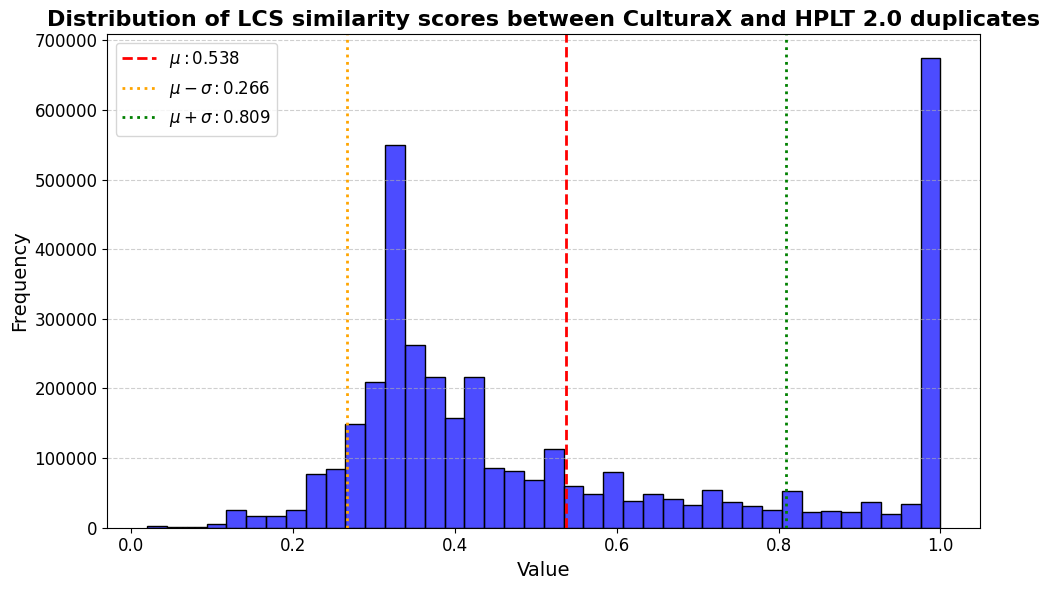

In [6]:
plot_histogram(similarities, bins=40, title="Distribution of LCS similarity scores between CulturaX and HPLT 2.0 duplicates")

## FineWeb2 vs CulturaX

In [4]:
import tqdm

unique_combined = set()

culturax_docs = 0
fineweb2_docs = 0
duplicates = 0

with open('/media/storage/masters/corpora-sources/0000_culturax_source_info.txt', 'r') as f:
    for line in f:
        culturax_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        # if combined in unique_combined:
        #     duplicates.add(combined)
        unique_combined.add(combined)


duplicates_bar = tqdm.tqdm(desc='duplicates')

with open('/media/storage/masters/corpora-sources/0000_fineweb2_source_info.txt', 'r') as f:
    for line in f:
        fineweb2_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        if combined in unique_combined:
            duplicates += 1
            duplicates_bar.update()

print(f"Total CulturaX documents: {culturax_docs:,}")
print(f"Total FineWeb2 documents: {fineweb2_docs:,}")
print(f"Number of duplicates: {duplicates:,}")
print(f"Duplicate percentage (of FineWeb2): {(duplicates / fineweb2_docs):.2%}")
print(f"Duplicate percentage (of CulturaX): {(duplicates / culturax_docs):.2%}")

duplicates: 3748748it [04:16, 14634.04it/s]


Total CulturaX documents: 44,740,544
Total FineWeb2 documents: 47,552,562
Number of duplicates: 8,559,056
Duplicate percentage (of FineWeb2): 18.00%
Duplicate percentage (of CulturaX): 19.13%


### Comparing text for duplicate

In [2]:
unique_combined = set()

culturax_docs = 0
fineweb2_docs = 0
duplicates = 0

with open('/media/storage/masters/corpora-sources/0000_culturax_source_info.txt', 'r') as f:
    for line in f:
        culturax_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        # if combined in unique_combined:
        #     duplicates.add(combined)
        unique_combined.add(combined)

with open('/media/storage/masters/corpora-sources/0000_fineweb2_source_info.txt', 'r') as f, \
     open('/media/storage/masters/corpora-sources/fineweb2-culturax-duplicates.txt', 'w') as w:

    for line in f:
        fineweb2_docs += 1

        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        combined = (url, timestamp)

        if combined in unique_combined:
            duplicates += 1
            w.write(f'{combined[0]}\t{combined[1]}\n')

del unique_combined

In [3]:
duplicates = set()
with open('/media/storage/masters/corpora-sources/fineweb2-culturax-duplicates.txt') as f:
    for line in f:
        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1].strip()
        combined = (url, timestamp)

        duplicates.add(combined)
    
len(duplicates)

8559056

In [4]:
import pylcs
import tqdm.notebook as tqdm

duplicate2text = dict()

with open('/media/storage/masters/corpora-sources/0000_culturax_source_info.txt', 'r') as f:
    for line in f:
        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        text = parts[2]
        combined = (url, timestamp)

        if combined in duplicates:
            duplicate2text[combined] = text


exact_matches = 0
similarities = []

progress_bar = tqdm.tqdm(total=len(duplicate2text))

with open('/media/storage/masters/corpora-sources/0000_fineweb2_source_info.txt', 'r') as f:
    for line in f:
        parts = line.split('\t', 2)
        url = parts[0]
        timestamp = parts[1]
        text = parts[2]
        combined = (url, timestamp)

        if (other_text := duplicate2text.get(combined)):
            progress_bar.update()
            similarities.append(pylcs.lcs(text, other_text) / min(len(text), len(other_text)))
            if text == other_text:
                exact_matches += 1


print(f"Number of duplicates: {len(duplicates):,}")
print(f"Number of exact matches: {exact_matches:,}")
print(f"Ratio of exact matches to duplicates: {exact_matches / len(duplicates):.2%}")

  0%|          | 0/8559056 [00:00<?, ?it/s]

Number of duplicates: 8,559,056
Number of exact matches: 1,224,682
Ratio of exact matches to duplicates: 14.31%


/home/goader/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


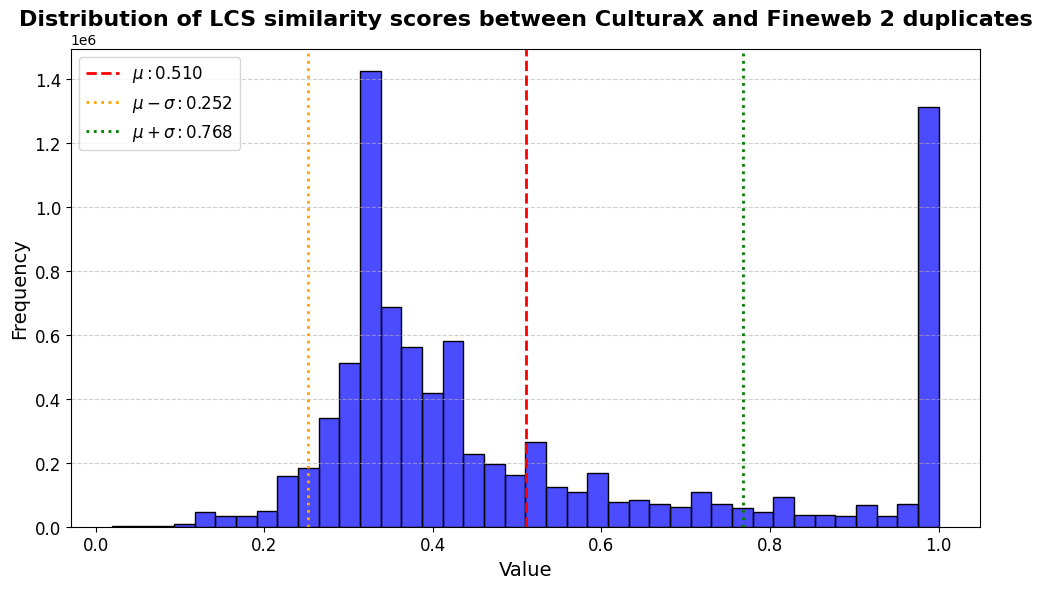

In [5]:
plot_histogram(similarities, bins=40, title="Distribution of LCS similarity scores between CulturaX and Fineweb 2 duplicates")